In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

# to make this notebook's output stable across runs
np.random.seed(42)
tf.random.set_seed(42)

# To plot p8783000111579895retty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

2024-10-25 12:47:53.995454: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-10-25 12:47:54.017474: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Let's start by loading the fashion MNIST dataset. Keras has a number of functions to load popular datasets in `keras.datasets`. The dataset is already split for you between a training set and a test set, but it can be useful to split the training set further to have a validation set:

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

The training set contains 60,000 grayscale images, each 28x28 pixels:

In [3]:
X_train_full.shape

(60000, 28, 28)

Each pixel intensity is represented as a byte (0 to 255):

In [4]:
X_train_full.dtype

dtype('uint8')

Let's split the full training set into a validation set and a (smaller) training set. We also scale the pixel intensities down to the 0-1 range and convert them to floats, by dividing by 255.

In [5]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

You can plot an image using Matplotlib's `imshow()` function, with a `'binary'`
 color map:

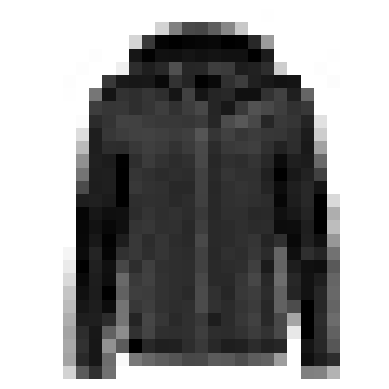

In [6]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

The labels are the class IDs (represented as uint8), from 0 to 9:

In [7]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

Here are the corresponding class names:

In [8]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

So the first image in the training set is a coat:

In [9]:
class_names[y_train[0]]

'Coat'

The validation set contains 5,000 images, and the test set contains 10,000 images:

In [10]:
X_valid.shape

(5000, 28, 28)

In [11]:
X_test.shape

(10000, 28, 28)

Let's take a look at a sample of the images in the dataset:

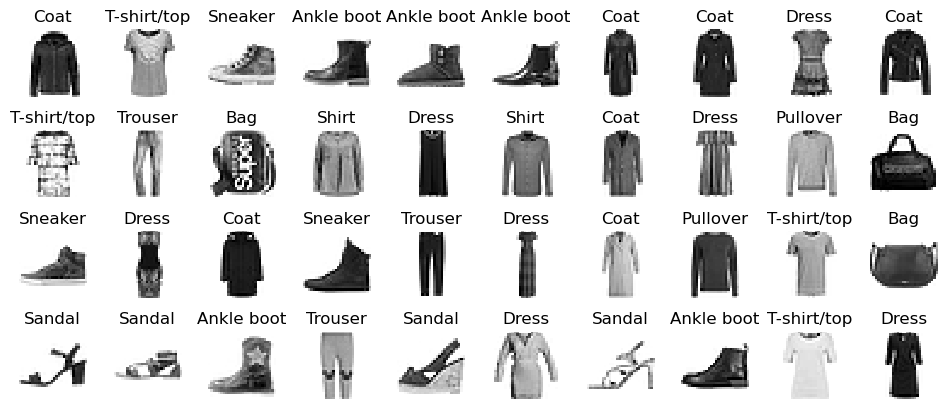

In [12]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [30]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

model2 = keras.models.Sequential()
model2.add(keras.layers.Flatten(input_shape=[28, 28]))
model2.add(keras.layers.Dense(250, activation="relu"))
model2.add(keras.layers.Dense(150, activation="relu"))
model2.add(keras.layers.Dense(100, activation="relu"))
model2.add(keras.layers.Dense(10, activation="softmax"))

/home/gabriele/Software/miniforge3/envs/ml/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [31]:
model2.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 250)            │       196,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 150)            │        37,650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 100)            │        15,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 250,010 (976.60 KB)

 Trainable params: 250,010 (976.60 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)
# requires  pydot (`pip install pydot`) and graphviz 

You must install pydot (`pip install pydot`) for `plot_model` to work.


In [32]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

model2.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

This is equivalent to:

```python
model.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer=keras.optimizers.SGD(),
              metrics=[keras.metrics.sparse_categorical_accuracy])
```

In [18]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 943us/step - accuracy: 0.6765 - loss: 1.0011 - val_accuracy: 0.8242 - val_loss: 0.5208
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 876us/step - accuracy: 0.8267 - loss: 0.4985 - val_accuracy: 0.8486 - val_loss: 0.4536
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 893us/step - accuracy: 0.8439 - loss: 0.4467 - val_accuracy: 0.8590 - val_loss: 0.4210
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 892us/step - accuracy: 0.8547 - loss: 0.4175 - val_accuracy: 0.8640 - val_loss: 0.3990
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 888us/step - accuracy: 0.8614 - loss: 0.3968 - val_accuracy: 0.8674 - val_loss: 0.3850
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 890us/step - accuracy: 0.8661 - loss: 0.3805 - val_accuracy: 0.8706 - val_loss: 0.3733
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 893us/step - accuracy: 0.8709 - loss: 0.3669 - val_accuracy: 0.8742 - val_loss: 0.3641
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 877us/step - accuracy: 0.8736 -

In [33]:
history = model2.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6392 - loss: 1.0880 - val_accuracy: 0.8150 - val_loss: 0.5333
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 910us/step - accuracy: 0.8251 - loss: 0.4921 - val_accuracy: 0.8444 - val_loss: 0.4512
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 908us/step - accuracy: 0.8449 - loss: 0.4345 - val_accuracy: 0.8564 - val_loss: 0.4106
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 907us/step - accuracy: 0.8557 - loss: 0.4024 - val_accuracy: 0.8646 - val_loss: 0.3875
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 907us/step - accuracy: 0.8645 - loss: 0.3800 - val_accuracy: 0.8692 - val_loss: 0.3713
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 923us/step - accuracy: 0.8702 - loss: 0.3626 - val_accuracy: 0.8726 - val_loss: 0.3604
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 914us/step - accuracy: 0.8745 - loss: 0.3481 - val_accuracy: 0.8740 - val_loss: 0.3498
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 922us/step - accuracy: 0.8788 - l

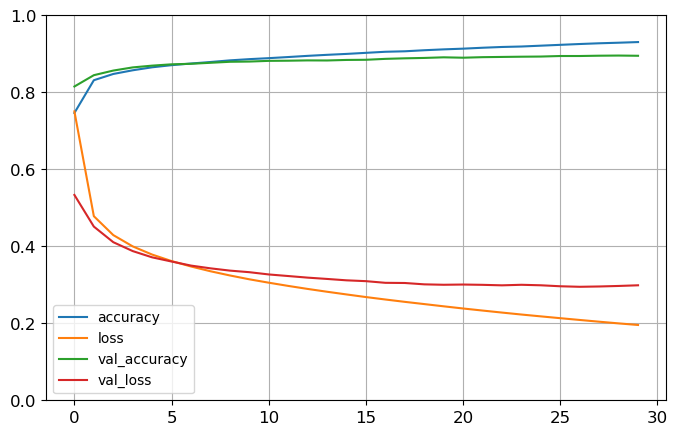

In [34]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [ ]:
model2.evaluate(X_test, y_test)

In [20]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.01, 0.  , 0.99],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [21]:
y_pred = np.argmax(model2.predict(X_new), axis=-1)
print(y_pred)
np.array(class_names)[y_pred]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
[6 3 0]


array(['Shirt', 'Dress', 'T-shirt/top'], dtype='<U11')

In [22]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

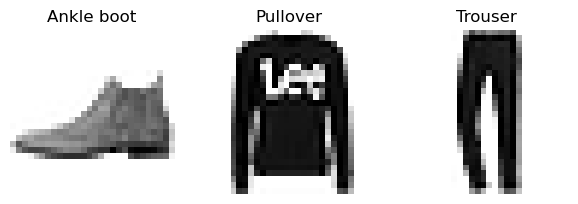

In [23]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

### Additional metrics

In [24]:
from sklearn.metrics import classification_report
y_pred = np.argmax(model.predict(X_test), axis=-1)

print(classification_report(y_test, y_pred))

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 600us/step
              precision    recall  f1-score   support

           0       0.87      0.78      0.83      1000
           1       0.98      0.97      0.98      1000
           2       0.75      0.84      0.79      1000
           3       0.91      0.83      0.87      1000
           4       0.77      0.84      0.80      1000
           5       0.96      0.97      0.96      1000
           6       0.72      0.70      0.71      1000
           7       0.95      0.94      0.95      1000
           8       0.97      0.97      0.97      1000
           9       0.96      0.96      0.96      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



## Saving and Restoring

In [ ]:
model.save("my_keras_model.h5")

In [ ]:
model = keras.models.load_model("my_keras_model.h5")

In [ ]:
y_proba = model.predict(X_new)
y_proba.round(2)

# TensorBoard

In [26]:
import os
root_logdir = os.path.join(os.curdir, "my_logs")

In [27]:
def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()
run_logdir

'./my_logs/run_2024_10_25-12_56_21'

In [28]:
model = tf.keras.models.clone_model(model)
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

To start the TensorBoard server, one option is to open a terminal, if needed activate the virtualenv where you installed TensorBoard, go to this notebook's directory, then type:

```bash
$ tensorboard --logdir=./my_logs --port=6006
```

You can then open your web browser to [localhost:6006](http://localhost:6006) and use TensorBoard. 
Alternatively, you can load TensorBoard using a Jupyter/Colab extension and run it like this:

In [29]:
%load_ext tensorboard
%tensorboard --logdir=./my_logs --port=6006

In [ ]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid),
                    callbacks=[tensorboard_cb])